# Data management for ITSTGCN

SEOYEON CHOI  
2023-07-05

1.  순환형 구조를 가진 모델(Models with recurrent structures):

-   GConvGRU: 그래프 순환 유닛 (Graph Convolutional Gated Recurrent
    Unit)
-   GConvLSTM: 그래프 순환 LSTM (Graph Convolutional Long Short-Term
    Memory)
-   GCLSTM: 그래프 순환 LSTM (Graph Convolutional LSTM)
-   DCRNN: 이중 그래프 순환 신경망 (Dual Graph Convolutional Recurrent
    Neural Network)

1.  그래프 합성곱 모델(Graph convolution models):

-   LRGCN: 로컬-전역 그래프 합성곱 신경망 (Local-Global Graph
    Convolutional Network)
-   TGCN: 전이 그래프 합성곱 신경망 (Transition Graph Convolutional
    Network)
-   EvolveGCNO: 진화형 그래프 합성곱 네트워크 (Evolutionary Graph
    Convolutional Network with Optimization)
-   EvolveGCNH: 진화형 그래프 합성곱 네트워크 (Evolutionary Graph
    Convolutional Network with Hypernetwork)

1.  동적 값 업데이트를 활용한 모델(Models utilizing dynamic value
    updates):

-   DyGrEncoder: 동적 그래프 인코더 (Dynamic Graph Encoder)

논문에서 제안하는 방법은 GConvGRU (Chebyshev Graph Convolutional Gated
Recurrent Unit Cell)와 GConvLSTM (Graph Convolutional Recurrent
Network)이라는 두 가지 모델을 소개합니다. GConvGRU는 그래프 데이터에
대한 시간적인 의존성을 캡처하는데 사용되며, GConvLSTM은 그래프와 시퀀스
데이터를 동시에 처리하는데 활용됩니다.

GConvGRU는 Chebyshev 그래프 합성곱과 Gated Recurrent Unit (GRU)을
결합하여 그래프 데이터의 시간적 의존성을 모델링합니다. 이 모델은 그래프
내 노드들 간의 연결과 그래프의 구조를 고려하여 시계열 데이터를 예측하고
분석하는데 유용합니다.

“GC-LSTM: 그래프 합성곱 임베딩 LSTM을 이용한 동적 링크 예측”이라는
논문은 동적인 그래프에서 링크 예측 작업에 그래프 합성곱 네트워크(GCN)와
Long Short-Term Memory(LSTM) 셀을 결합한 새로운 모델을 제안합니다.

논문에서는 그래프 구조가 시간에 따라 변화하는 동적인 그래프에서 노드들
사이의 링크 존재 여부를 예측하는 문제를 다룹니다. 기존의 링크 예측
방법들은 동적인 그래프의 변화를 처리하는데 어려움이 있습니다.

제안하는 GC-LSTM 모델은 그래프 합성곱을 사용하여 노드의 특징을
임베딩하고 그래프 구조를 파악합니다. 동시에 LSTM 셀을 활용하여 시간적
의존성과 순차적 패턴을 모델링합니다.

GC-LSTM 모델은 동적인 그래프 데이터를 시간 순서대로 처리하여 변화하는
그래프 구조를 적절히 반영하고 미래의 링크를 정확하게 예측할 수 있습니다.
실험과 평가를 통해 GC-LSTM 모델이 동적인 링크 예측 작업에서 다른 최신
기법들보다 우수한 성능을 보여주며, 동적인 그래프 구조를 다루는데 유용한
접근 방법임을 입증합니다.

-   GNAR stationary condition

In [1]:
import itstgcn
import torch
import pandas as pd

import numpy as np
import random

In [2]:
data_dict = itstgcn.load_data('./data/fivenodes.pkl')
loader = itstgcn.DatasetLoader(data_dict)

In [3]:
dataset = loader.get_dataset(lags=2)

In [4]:
sum_result = 0
for i in range(5):
    sum_result += np.sum(np.array(dataset.targets)[:,i])
print(sum_result)

-28.048902156588262

In [5]:
from torch_geometric_temporal.dataset import ChickenpoxDatasetLoader
loader1 = ChickenpoxDatasetLoader()

In [6]:
dataset1 = loader1.get_dataset(lags=4)

In [7]:
sum_result = 0
for i in range(20):
    sum_result += np.sum(np.array(dataset1.targets)[:,i])
print(sum_result)

9.553510148236436

In [8]:
from torch_geometric_temporal.dataset import PedalMeDatasetLoader
loader2 = PedalMeDatasetLoader()

In [9]:
dataset2 = loader2.get_dataset(lags=4)

In [10]:
sum_result = 0
for i in range(15):
    sum_result += np.sum(np.array(dataset2.targets)[:,i])
print(sum_result)

-39.06545396690812

In [11]:
from torch_geometric_temporal.dataset import WikiMathsDatasetLoader
loader3 = WikiMathsDatasetLoader()

In [12]:
dataset3 = loader3.get_dataset(lags=8)

In [13]:
sum_result = 0
for i in range(1068):
    sum_result += np.sum(np.array(dataset3.targets)[:,i])
print(sum_result)

-1543.6160620151331

In [14]:
loader6 = itstgcn.load_data('./data/Windmillsmall.pkl')

In [15]:
dataset6 = loader6.get_dataset(lags=8)

In [16]:
sum_result = 0
for i in range(11):
    sum_result += np.sum(np.array(dataset6.targets)[:,i])
print(sum_result)

0.33864788949161806

In [17]:
from torch_geometric_temporal.dataset import MontevideoBusDatasetLoader
loader10 = MontevideoBusDatasetLoader()

In [18]:
dataset10 = loader10.get_dataset(lags=8)

In [19]:
sum_result = 0
for i in range(675):
    sum_result += np.sum(np.array(dataset10.targets)[:,i])
print(sum_result)

1114.5722422676997

# Import

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

-   GConvGRU

In [21]:
df_GConvGRU = pd.read_csv('./simulation_results/Real_simulation_reshape/Final_Simulation_GConvGRU.csv')

pedal_wiki_GSO_GConvGRU = pd.read_csv('./simulation_results/Real_simulation_reshape/Final_Simulation_GConvGRU_pedal_wiki_GSO.csv')

In [22]:
df_GConvGRU['model']='GConvGRU'
pedal_wiki_GSO_GConvGRU['model']='GConvGRU'

In [23]:
df_GConvGRU['dataset'].unique()

-   GConvLSTM

In [24]:
df_GConvLSTM = pd.read_csv('./simulation_results/Real_simulation_reshape/Final_Simulation_GConvLSTM.csv')

pedal_wiki_GSO_GConvLSTM = pd.read_csv('./simulation_results/Real_simulation_reshape/Final_Simulation_GConvLSTM_pedal_wiki_GSO.csv')

In [25]:
df_GConvLSTM['model']='GConvLSTM'
pedal_wiki_GSO_GConvLSTM['model']='GConvLSTM'

In [26]:
df_GConvLSTM['dataset'].unique()

-   GCLSTM

In [27]:
df_GCLSTM = pd.read_csv('./simulation_results/Real_simulation_reshape/Final_Simulation_GCLSTM.csv')

pedal_wiki_GSO_GCLSTM = pd.read_csv('./simulation_results/Real_simulation_reshape/Final_Simulation_GCLSTM_pedal_wiki_GSO.csv')

In [28]:
df_GCLSTM['model']='GCLSTM'
pedal_wiki_GSO_GCLSTM['model']='GCLSTM'

In [29]:
df_GCLSTM['dataset'].unique()

-   DCRNN

In [30]:
df_DCRNN = pd.read_csv('./simulation_results/Real_simulation_reshape/Final_Simulation_DCRNN.csv')

pedal_wiki_GSO_DCRNN = pd.read_csv('./simulation_results/Real_simulation_reshape/Final_Simulation_DCRNN_pedal_wiki_GSO.csv')

In [31]:
df_DCRNN['model']='DCRNN'
pedal_wiki_GSO_DCRNN['model']='DCRNN'

-   LRGCN

In [32]:
df_LRGCN = pd.read_csv('./simulation_results/Real_simulation_reshape/Final_Simulation_LRGCN.csv')

pedal_wiki_GSO_LRGCN = pd.read_csv('./simulation_results/Real_simulation_reshape/Final_Simulation_LRGCN_pedal_wiki_GSO.csv')

In [33]:
df_LRGCN['model']='LRGCN'
pedal_wiki_GSO_LRGCN['model']='LRGCN'

-   TGCN

In [34]:
df_TGCN = pd.read_csv('./simulation_results/Real_simulation_reshape/Final_Simulation_TGCN.csv')

pedal_wiki_GSO_TGCN = pd.read_csv('./simulation_results/Real_simulation_reshape/Final_Simulation_TGCN_pedal_wiki_GSO.csv')

In [35]:
df_TGCN['model']='TGCN'
pedal_wiki_GSO_TGCN['model']='TGCN'

-   EvolveGCNO

In [36]:
df_EvolveGCNO = pd.read_csv('./simulation_results/Real_simulation_reshape/Final_Simulation_EvolveGCNO.csv')

pedal_wiki_GSO_EvolveGCNO = pd.read_csv('./simulation_results/Real_simulation_reshape/Final_Simulation_EvolveGCNO_pedal_wiki_GSO.csv')

In [37]:
df_EvolveGCNO['model']='EvolveGCNO'
pedal_wiki_GSO_EvolveGCNO['model']='EvolveGCNO'

-   DYGRENCODER

In [38]:
df_DYGRENCODER = pd.read_csv('./simulation_results/Real_simulation_reshape/Final_Simulation_DYGRENCODER.csv')

pedal_wiki_GSO_DYGRENCODER = pd.read_csv('./simulation_results/Real_simulation_reshape/Final_Simulation_DYGRENCODER_pedal_wiki_GSO.csv')

In [39]:
df_DYGRENCODER['model']='DyGrEncoder'
pedal_wiki_GSO_DYGRENCODER['model']='DyGrEncoder'

-   EvolveGCNH

In [40]:
df_EvolveGCNH = pd.read_csv('./simulation_results/Real_simulation_reshape/Final_Simulation_EvolveGCNH.csv')

pedal_wiki_GSO_EvolveGCNH = pd.read_csv('./simulation_results/Real_simulation_reshape/Final_Simulation_EvolveGCNH_pedal_wiki_GSO.csv')

In [41]:
df_EvolveGCNH['model']='EvolveGCNH'
pedal_wiki_GSO_EvolveGCNH['model']='EvolveGCNH'

-   GNAR

In [42]:
df_GNAR = pd.read_csv('./simulation_results/Real_simulation_reshape/Final_Simulation_GNAR.csv')

wiki_GSO_GNAR = pd.read_csv('./simulation_results/Real_simulation_reshape/Final_Simulation_GNAR_wiki_GSO.csv')

In [43]:
df_GNAR['model']='GNAR'
wiki_GSO_GNAR['model']='GNAR'

-   all

In [44]:
df = pd.concat([df_GConvGRU, df_GConvLSTM, df_GCLSTM, df_DCRNN, df_LRGCN, df_TGCN, df_EvolveGCNO, df_DYGRENCODER, df_EvolveGCNH,df_GNAR]).reset_index().iloc[:,1:]

In [45]:
df

In [46]:
df.to_csv('./df_fig.csv')

In [47]:
df2 = pd.concat([pedal_wiki_GSO_GConvGRU,pedal_wiki_GSO_GConvLSTM,pedal_wiki_GSO_GCLSTM,pedal_wiki_GSO_DCRNN,pedal_wiki_GSO_LRGCN,pedal_wiki_GSO_TGCN,pedal_wiki_GSO_EvolveGCNO,pedal_wiki_GSO_DYGRENCODER,pedal_wiki_GSO_EvolveGCNH,wiki_GSO_GNAR])

In [48]:
df2

# fivenode

## Baseline

In [49]:
df.query("model=='GNAR' and dataset=='fivenodes'")

In [50]:
pd.merge(df.query("dataset=='fivenodes' and mtype!='rand' and mtype!='block'").groupby(['model','nof_filters','lags','epoch'])['mse'].mean().reset_index(),
         df.query("dataset=='fivenodes' and mtype!='rand' and mtype!='block'").groupby(['model','nof_filters','lags','epoch'])['mse'].std().reset_index(),
         on=['model','nof_filters','lags','epoch']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3)

## Random

https://matplotlib.org/stable/gallery/statistics/boxplot.html#sphx-glr-gallery-statistics-boxplot-py

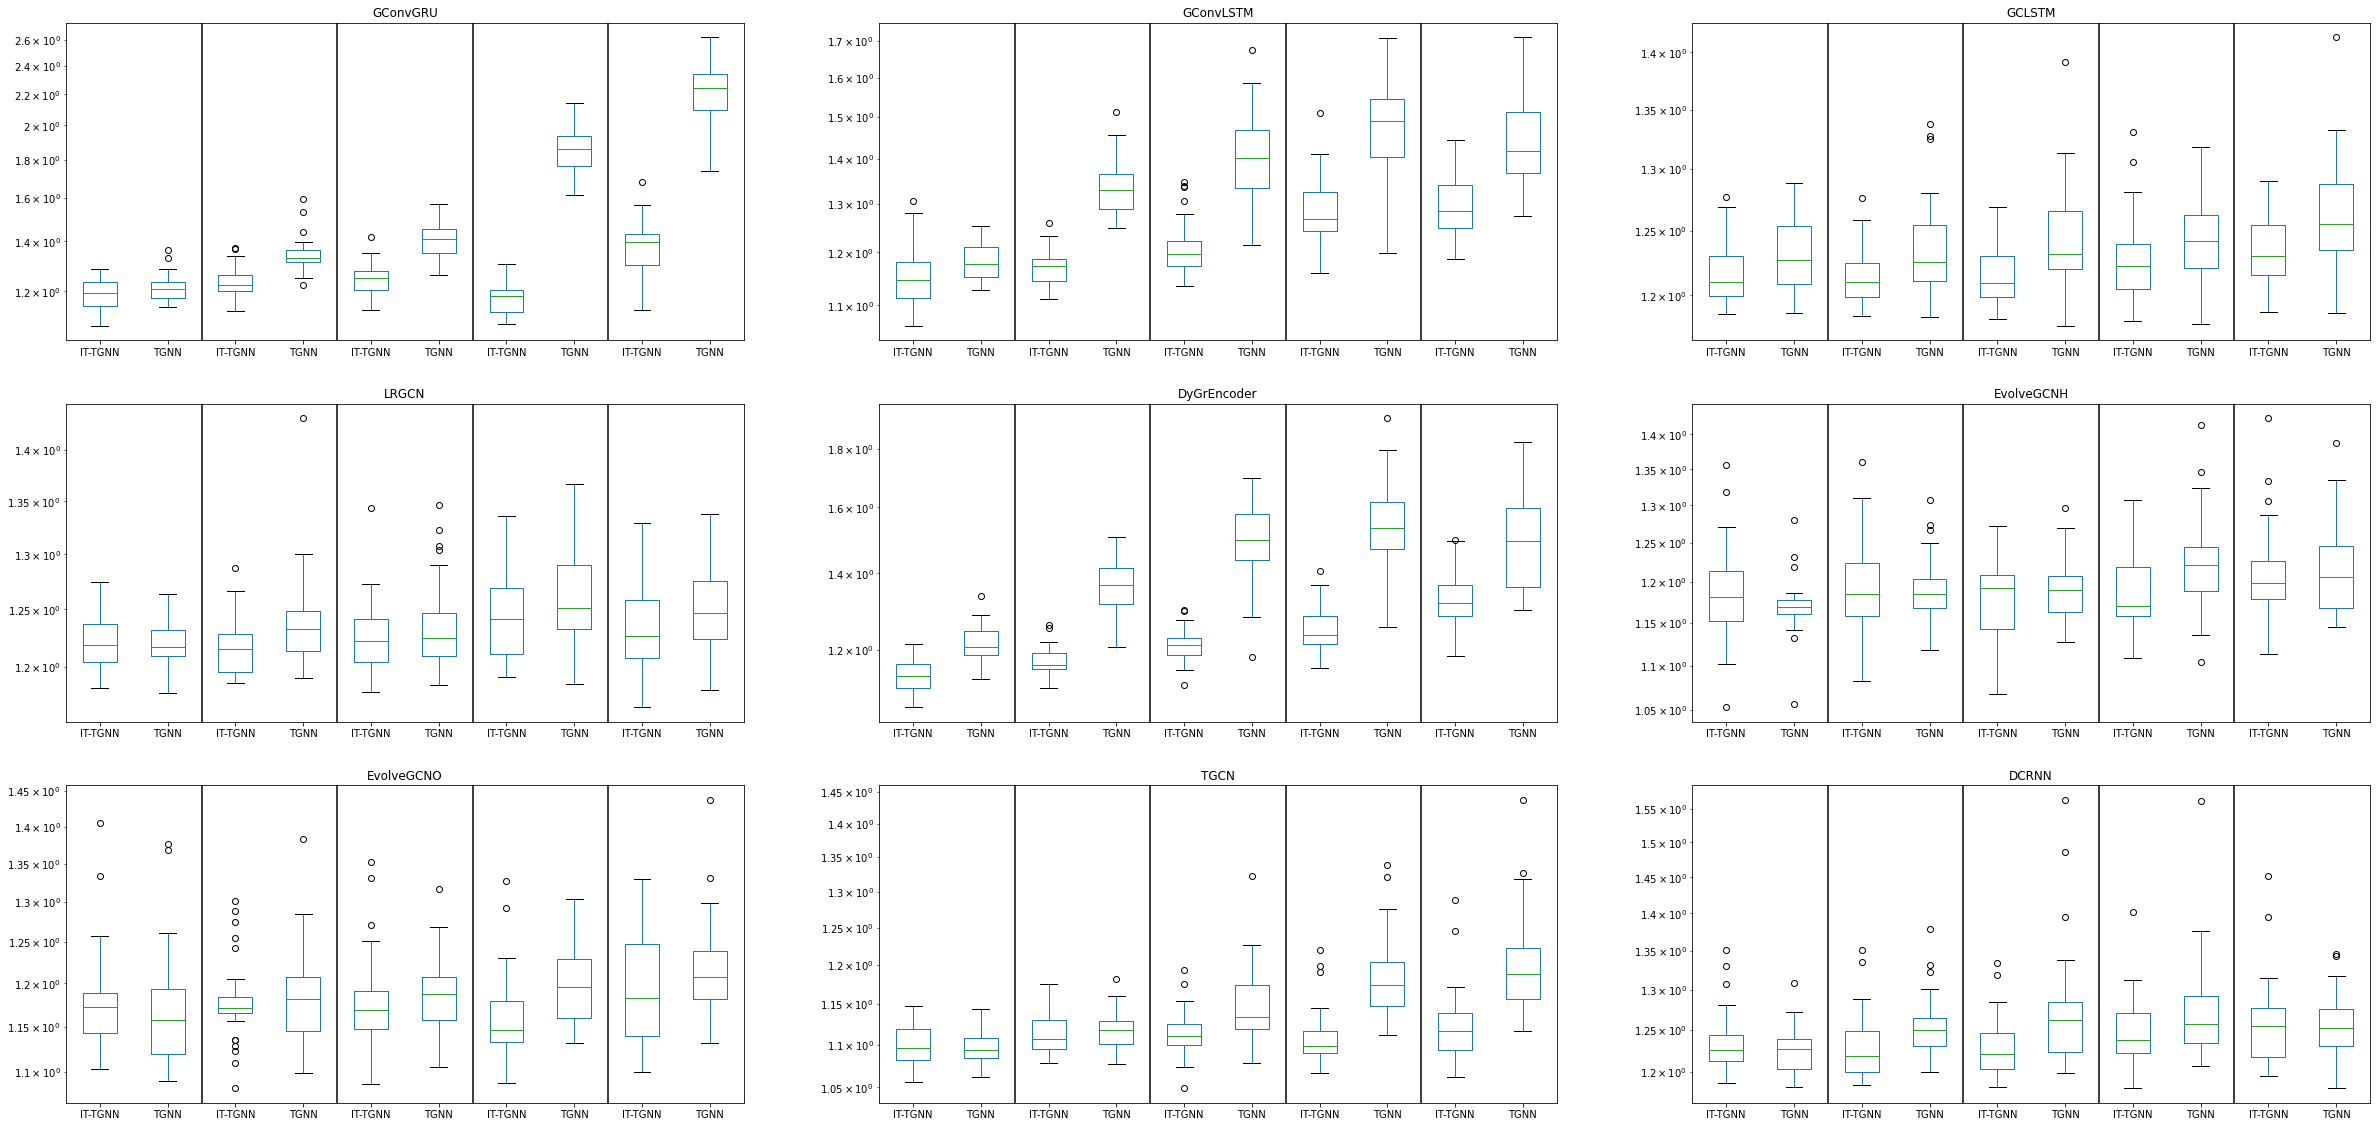

In [51]:
# with plt.style.context('cyberpunk'):
#     plt.rcParams['figure.figsize'] = [40,20]
fig, ax = plt.subplots(3, 3,figsize=(40,20))

df.query("dataset=='fivenodes' and mtype=='rand' and inter_method == 'linear' and nof_filters==12 and lags==2 and epoch==50 and model=='GConvGRU' and mrate in [0.3  , 0.5  , 0.6 ,0.7  , 0.8]").\
iloc[:,[1,2,8,10]].boxplot(by=['model','mrate','method'],ax=ax[0,0],grid=False,widths=0.5)
ax[0,0].set_title('GConvGRU')

df.query("dataset=='fivenodes' and mtype=='rand' and inter_method == 'linear' and nof_filters==12 and lags==2 and epoch==50 and model=='GConvLSTM' and mrate in [0.3  , 0.5  , 0.6 ,0.7  , 0.8]").\
iloc[:,[1,2,8,10]].boxplot(by=['model','mrate','method'],ax=ax[0,1],grid=False,widths=0.5)
ax[0,1].set_title('GConvLSTM')

df.query("dataset=='fivenodes' and mtype=='rand' and inter_method == 'linear' and nof_filters==4 and lags==2 and epoch==50 and model=='GCLSTM' and mrate in [0.3  , 0.5  , 0.6 ,0.7  , 0.8]").\
iloc[:,[1,2,8,10]].boxplot(by=['model','mrate','method'],ax=ax[0,2],grid=False,widths=0.5)
ax[0,2].set_title('GCLSTM')

df.query("dataset=='fivenodes' and mtype=='rand' and inter_method == 'linear' and nof_filters==4 and lags==2 and epoch==50 and model=='LRGCN' and mrate in [0.3  , 0.5  , 0.6 ,0.7  , 0.8]").\
iloc[:,[1,2,8,10]].boxplot(by=['model','mrate','method'],ax=ax[1,0],grid=False,widths=0.5)
ax[1,0].set_title('LRGCN')

df.query("dataset=='fivenodes' and mtype=='rand' and inter_method == 'linear' and nof_filters==12 and lags==2 and epoch==50 and model=='DyGrEncoder' and mrate in [0.3  , 0.5  , 0.6 ,0.7  , 0.8]").\
iloc[:,[1,2,8,10]].boxplot(by=['model','mrate','method'],ax=ax[1,1],grid=False,widths=0.5)
ax[1,1].set_title('DyGrEncoder')

df.query("dataset=='fivenodes' and mtype=='rand' and inter_method == 'linear' and lags==2 and epoch==50 and model=='EvolveGCNH' and mrate in [0.3  , 0.5  , 0.6 ,0.7  , 0.8]").\
iloc[:,[1,2,8,10]].boxplot(by=['model','mrate','method'],ax=ax[1,2],grid=False,widths=0.5)
ax[1,2].set_title('EvolveGCNH')

df.query("dataset=='fivenodes' and mtype=='rand' and inter_method == 'linear' and lags==2 and epoch==50 and model=='EvolveGCNO' and mrate in [0.3  , 0.5  , 0.6 ,0.7  , 0.8]").\
iloc[:,[1,2,8,10]].boxplot(by=['model','mrate','method'],ax=ax[2,0],grid=False,widths=0.5)
ax[2,0].set_title('EvolveGCNO')

df.query("dataset=='fivenodes' and mtype=='rand' and inter_method == 'linear' and nof_filters==12 and lags==2 and epoch==50 and model=='TGCN' and mrate in [0.3  , 0.5  , 0.6 ,0.7  , 0.8]").\
iloc[:,[1,2,8,10]].boxplot(by=['model','mrate','method'],ax=ax[2,1],grid=False,widths=0.5)
ax[2,1].set_title('TGCN')

df.query("dataset=='fivenodes' and mtype=='rand' and inter_method == 'linear' and nof_filters==2 and lags==2 and epoch==50 and model=='DCRNN' and mrate in [0.3  , 0.5  , 0.6 ,0.7  , 0.8]").\
iloc[:,[1,2,8,10]].boxplot(by=['model','mrate','method'],ax=ax[2,2],grid=False,widths=0.5)
ax[2,2].set_title('DCRNN')


for ax in ax.flat:
    ax.set_yticklabels([])
    ax.set_yscale('log')
    ax.axvline(x=2.5, color='black', linestyle='-')
    ax.axvline(x=4.5, color='black', linestyle='-')
    ax.axvline(x=6.5, color='black', linestyle='-')
    ax.axvline(x=8.5, color='black', linestyle='-')
    ax.set_xticklabels(['IT-TGNN','TGNN','IT-TGNN','TGNN','IT-TGNN','TGNN','IT-TGNN','TGNN','IT-TGNN','TGNN'])
    ax.set_xlabel('')
    ax.set_ylabel('')
    
fig.suptitle('',fontsize=40)

In [52]:
pd.merge(df.query("dataset=='fivenodes' and mtype=='rand'").groupby(['model','mrate','nof_filters','inter_method','method','lags','epoch'])['mse'].mean().reset_index(),
         df.query("dataset=='fivenodes' and mtype=='rand'").groupby(['model','mrate','nof_filters','inter_method','method','lags','epoch'])['mse'].std().reset_index(),
         on=['model','inter_method','method','nof_filters','mrate','lags','epoch']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3).query("mrate==0.7 and inter_method=='linear'")

In [53]:
pd.merge(df.query("dataset=='fivenodes' and mtype=='rand'").groupby(['model','mrate','nof_filters','inter_method','method','lags','epoch'])['mse'].mean().reset_index(),
         df.query("dataset=='fivenodes' and mtype=='rand'").groupby(['model','mrate','nof_filters','inter_method','method','lags','epoch'])['mse'].std().reset_index(),
         on=['model','inter_method','method','nof_filters','mrate','lags','epoch']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3).query("mrate==0.8")

## Block

In [54]:
pd.merge(df.query("dataset=='fivenodes' and mtype=='block'").groupby(['model','mrate','nof_filters','inter_method','method','epoch'])['mse'].mean().reset_index(),
         df.query("dataset=='fivenodes' and mtype=='block'").groupby(['model','mrate','nof_filters','inter_method','method','epoch'])['mse'].std().reset_index(),
         on=['model','inter_method','method','nof_filters','mrate','epoch']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3)

In [55]:
pd.merge(df.query("dataset=='fivenodes' and mtype=='block'").groupby(['model','mrate','nof_filters','inter_method','method','epoch'])['mse'].mean().reset_index(),
         df.query("dataset=='fivenodes' and mtype=='block'").groupby(['model','mrate','nof_filters','inter_method','method','epoch'])['mse'].std().reset_index(),
         on=['model','inter_method','method','nof_filters','mrate','epoch']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3).query("inter_method=='linear'")

# ChickenpoxDatasetLoader(lags=4)

In [56]:
df.query("model=='GNAR' and dataset=='chickenpox'")

## Baseline

In [57]:
pd.merge(df.query("dataset=='chickenpox' and mtype!='rand' and mtype!='block'").groupby(['model','nof_filters'])['mse'].mean().reset_index(),
         df.query("dataset=='chickenpox' and mtype!='rand' and mtype!='block'").groupby(['model','nof_filters'])['mse'].std().reset_index(),
         on=['model','nof_filters']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3)

## Random

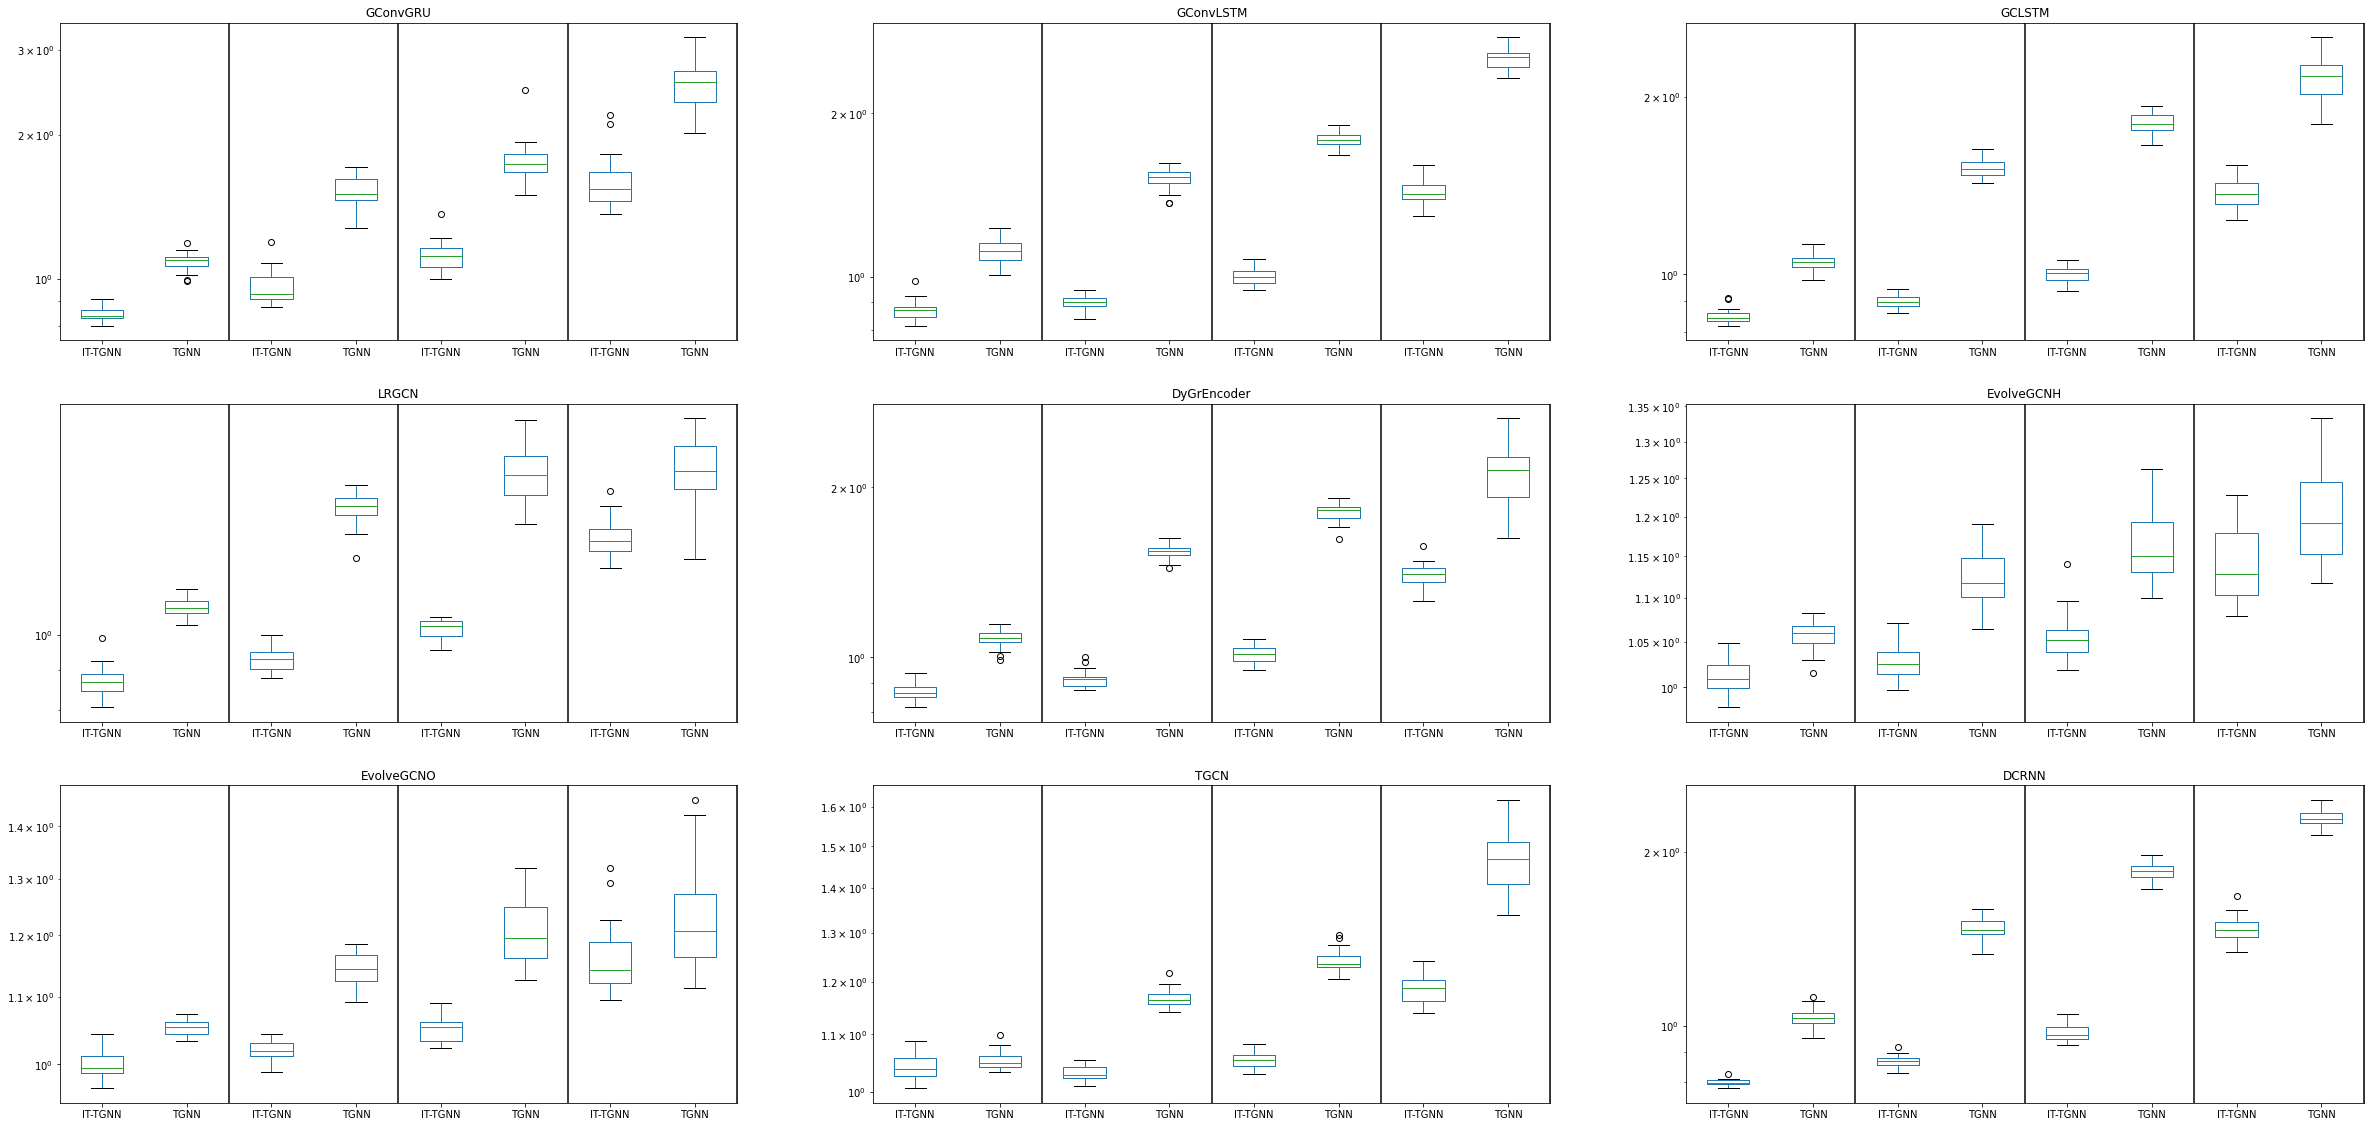

In [58]:
fig, ax = plt.subplots(3, 3,figsize=(40,20))

df.query("dataset=='chickenpox' and mtype=='rand' and inter_method == 'linear' and nof_filters==16 and lags==4 and epoch==50 and model=='GConvGRU' and mrate in [ 0.3   , 0.5   ,   0.6  , 0.8 ]").\
iloc[:,[1,2,8,10]].boxplot(by=['model','mrate','method'],ax=ax[0,0],grid=False,widths=0.5)
ax[0,0].set_title('GConvGRU')

df.query("dataset=='chickenpox' and mtype=='rand' and inter_method == 'linear' and nof_filters==32 and lags==4 and epoch==50 and model=='GConvLSTM' and mrate in [ 0.3   , 0.5   ,   0.6  , 0.8 ]").\
iloc[:,[1,2,8,10]].boxplot(by=['model','mrate','method'],ax=ax[0,1],grid=False,widths=0.5)
ax[0,1].set_title('GConvLSTM')

df.query("dataset=='chickenpox' and mtype=='rand' and inter_method == 'linear' and nof_filters==16 and lags==4 and epoch==50 and model=='GCLSTM' and mrate in [ 0.3   , 0.5   ,   0.6  , 0.8 ]").\
iloc[:,[1,2,8,10]].boxplot(by=['model','mrate','method'],ax=ax[0,2],grid=False,widths=0.5)
ax[0,2].set_title('GCLSTM')

df.query("dataset=='chickenpox' and mtype=='rand' and inter_method == 'linear' and nof_filters==8 and lags==4 and epoch==50 and model=='LRGCN' and mrate in [ 0.3   , 0.5   ,   0.6  , 0.8 ]").\
iloc[:,[1,2,8,10]].boxplot(by=['model','mrate','method'],ax=ax[1,0],grid=False,widths=0.5)
ax[1,0].set_title('LRGCN')

df.query("dataset=='chickenpox' and mtype=='rand' and inter_method == 'linear' and nof_filters==12 and lags==4 and epoch==50 and model=='DyGrEncoder' and mrate in [ 0.3   , 0.5   ,   0.6  , 0.8 ]").\
iloc[:,[1,2,8,10]].boxplot(by=['model','mrate','method'],ax=ax[1,1],grid=False,widths=0.5)
ax[1,1].set_title('DyGrEncoder')

df.query("dataset=='chickenpox' and mtype=='rand' and inter_method == 'linear' and lags==4 and epoch==50 and model=='EvolveGCNH' and mrate in [ 0.3   , 0.5   ,   0.6  , 0.8 ]").\
iloc[:,[1,2,8,10]].boxplot(by=['model','mrate','method'],ax=ax[1,2],grid=False,widths=0.5)
ax[1,2].set_title('EvolveGCNH')

df.query("dataset=='chickenpox' and mtype=='rand' and inter_method == 'linear' and lags==4 and epoch==50 and model=='EvolveGCNO' and mrate in [ 0.3   , 0.5   ,   0.6  , 0.8 ]").\
iloc[:,[1,2,8,10]].boxplot(by=['model','mrate','method'],ax=ax[2,0],grid=False,widths=0.5)
ax[2,0].set_title('EvolveGCNO')

df.query("dataset=='chickenpox' and mtype=='rand' and inter_method == 'linear' and nof_filters==12 and lags==4 and epoch==50 and model=='TGCN' and mrate in [ 0.3   , 0.5   ,   0.6  , 0.8 ]").\
iloc[:,[1,2,8,10]].boxplot(by=['model','mrate','method'],ax=ax[2,1],grid=False,widths=0.5)
ax[2,1].set_title('TGCN')

df.query("dataset=='chickenpox' and mtype=='rand' and inter_method == 'linear' and nof_filters==16 and lags==4 and epoch==50 and model=='DCRNN' and mrate in [ 0.3   , 0.5   ,   0.6  , 0.8 ]").\
iloc[:,[1,2,8,10]].boxplot(by=['model','mrate','method'],ax=ax[2,2],grid=False,widths=0.5)
ax[2,2].set_title('DCRNN')


for ax in ax.flat:
    ax.set_yticklabels([])
    ax.set_yscale('log')
    ax.axvline(x=2.5, color='black', linestyle='-')
    ax.axvline(x=4.5, color='black', linestyle='-')
    ax.axvline(x=6.5, color='black', linestyle='-')
    ax.axvline(x=8.5, color='black', linestyle='-')
    ax.set_xticklabels(['IT-TGNN','TGNN','IT-TGNN','TGNN','IT-TGNN','TGNN','IT-TGNN','TGNN'])
    ax.set_xlabel('')
    ax.set_ylabel('')
    
fig.suptitle('',fontsize=40)

In [59]:
pd.merge(df.query("dataset=='chickenpox' and mtype=='rand'").groupby(['model','mrate','inter_method','nof_filters','method'])['mse'].mean().reset_index(),
         df.query("dataset=='chickenpox' and mtype=='rand'").groupby(['model','mrate','inter_method','nof_filters','method'])['mse'].std().reset_index(),
         on=['model','method','inter_method','mrate','nof_filters']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3).query("mrate==0.3")

In [60]:
pd.merge(df.query("dataset=='chickenpox' and mtype=='rand'").groupby(['model','mrate','inter_method','nof_filters','method'])['mse'].mean().reset_index(),
         df.query("dataset=='chickenpox' and mtype=='rand'").groupby(['model','mrate','inter_method','nof_filters','method'])['mse'].std().reset_index(),
         on=['model','method','inter_method','mrate','nof_filters']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3).query("mrate!=0.3")

## Block

In [61]:
pd.merge(df.query("dataset=='chickenpox' and mtype=='block'").groupby(['model','inter_method','mrate','nof_filters','method'])['mse'].mean().reset_index(),
         df.query("dataset=='chickenpox' and mtype=='block'").groupby(['model','inter_method','mrate','nof_filters','method'])['mse'].std().reset_index(),
         on=['model','method','inter_method','mrate','nof_filters']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3)

In [62]:
pd.merge(df.query("dataset=='chickenpox' and mtype=='block'").groupby(['model','inter_method','mrate','nof_filters','method'])['mse'].mean().reset_index(),
         df.query("dataset=='chickenpox' and mtype=='block'").groupby(['model','inter_method','mrate','nof_filters','method'])['mse'].std().reset_index(),
         on=['model','method','inter_method','mrate','nof_filters']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3).query("inter_method=='linear'")

# PedalMeDatasetLoader (lags=4)

In [63]:
df.query("model=='GNAR' and dataset=='pedalme'")

## Baseline

In [64]:
pd.merge(df.query("dataset=='pedalme' and mtype!='rand' and mtype!='block'").groupby(['model','lags','nof_filters'])['mse'].mean().reset_index(),
         df.query("dataset=='pedalme' and mtype!='rand' and mtype!='block'").groupby(['model','lags','nof_filters'])['mse'].std().reset_index(),
         on=['model','lags','nof_filters']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3).query("lags==4")

## Random

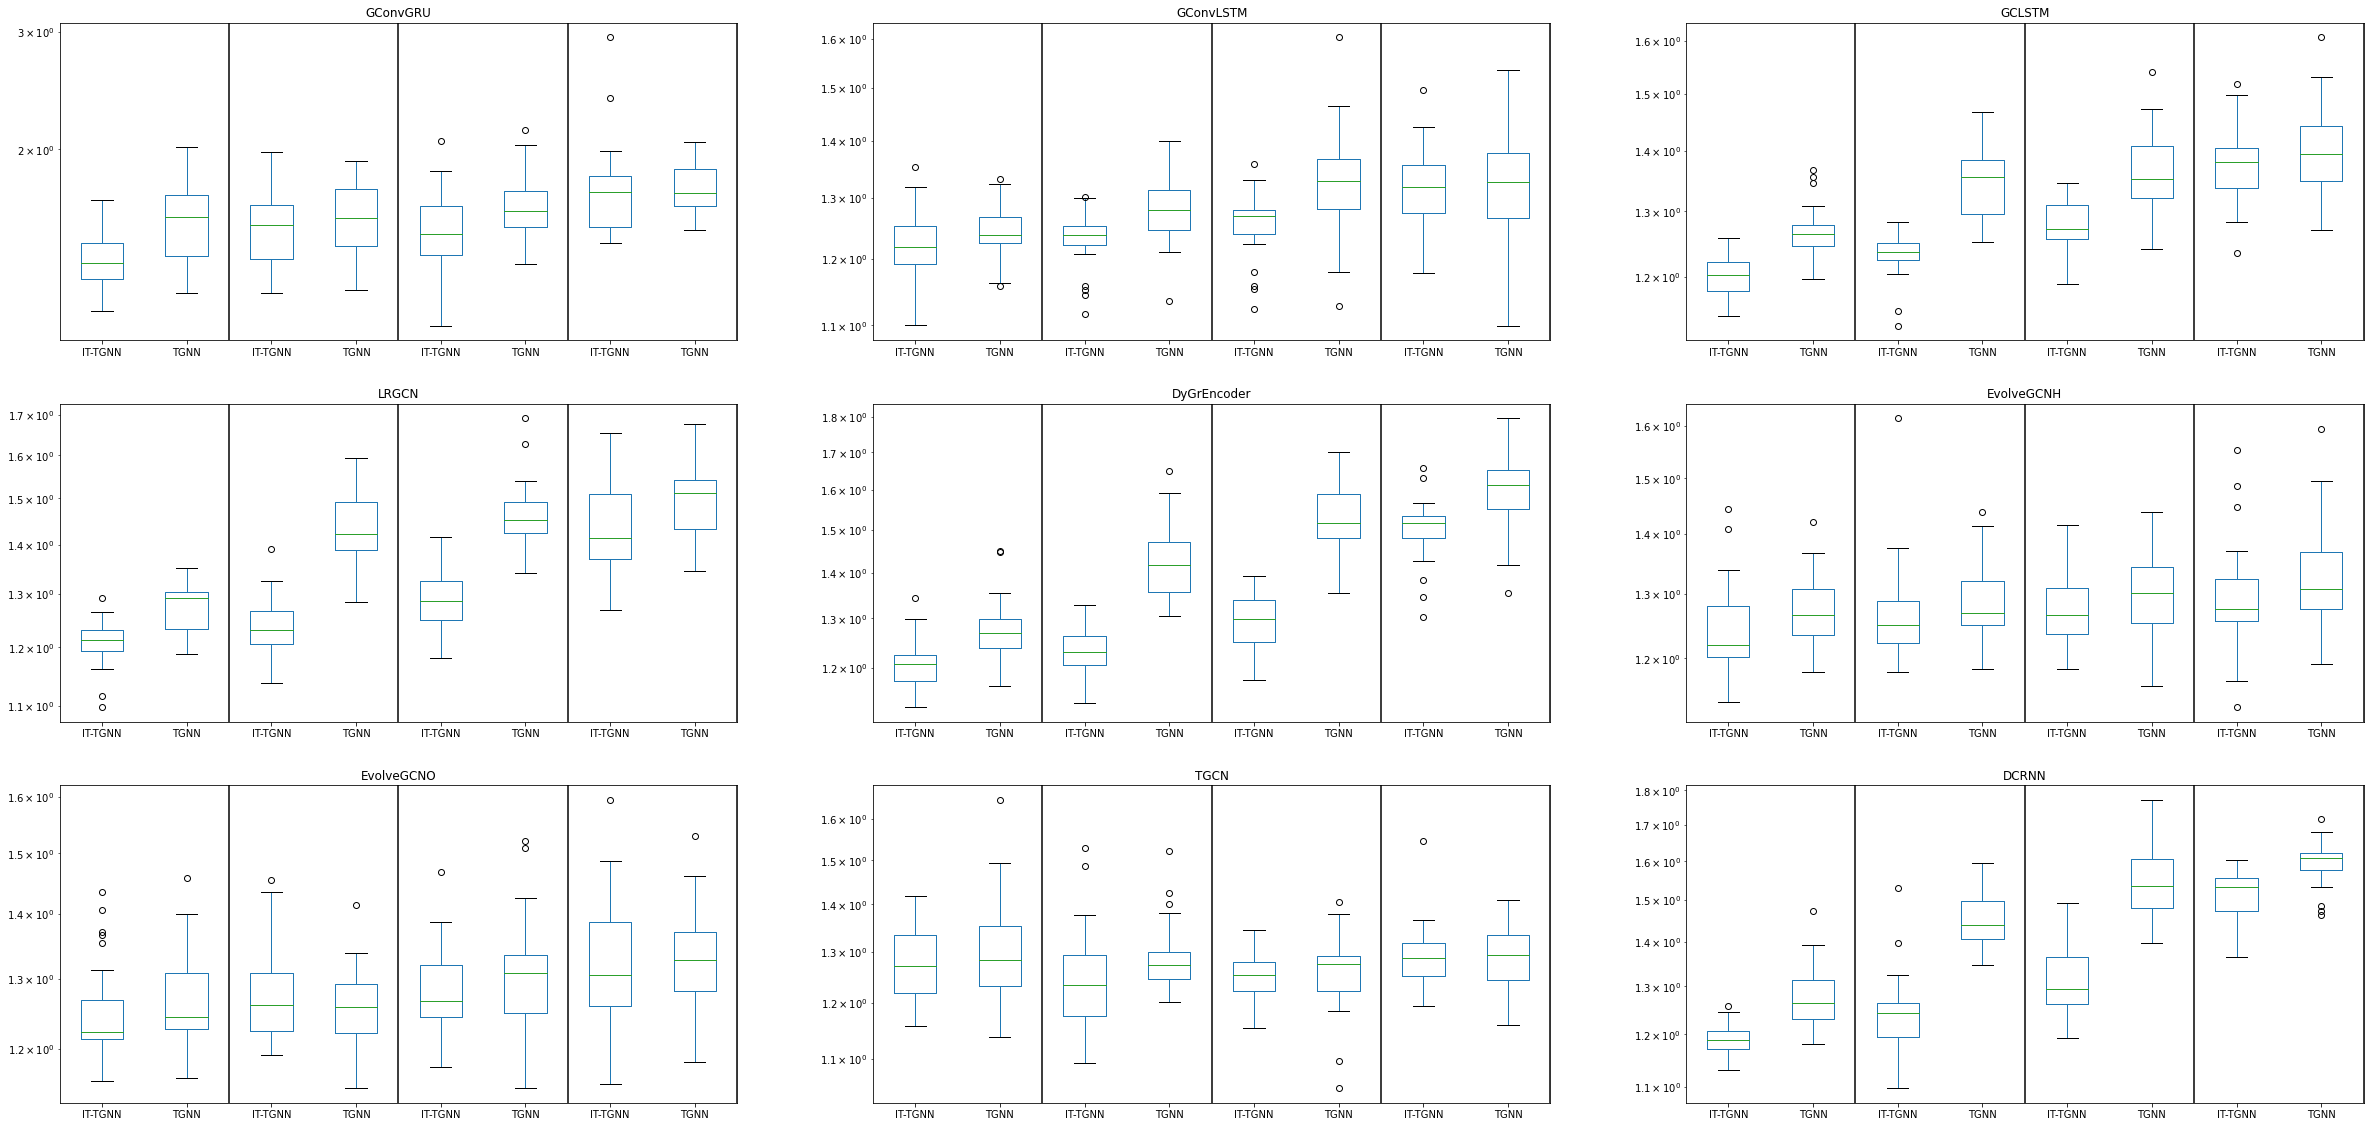

In [65]:
fig, ax = plt.subplots(3, 3,figsize=(40,20))

df.query("dataset=='pedalme' and mtype=='rand' and inter_method == 'linear' and nof_filters==12 and lags==4 and epoch==50 and model=='GConvGRU' and mrate in [0.3,0.5,0.6,0.8]").\
iloc[:,[1,2,8,10]].boxplot(by=['model','mrate','method'],ax=ax[0,0],grid=False,widths=0.5)
ax[0,0].set_title('GConvGRU')

df.query("dataset=='pedalme' and mtype=='rand' and inter_method == 'linear' and nof_filters==2 and lags==4 and epoch==50 and model=='GConvLSTM' and mrate in [0.3,0.5,0.6,0.8]").\
iloc[:,[1,2,8,10]].boxplot(by=['model','mrate','method'],ax=ax[0,1],grid=False,widths=0.5)
ax[0,1].set_title('GConvLSTM')

df.query("dataset=='pedalme' and mtype=='rand' and inter_method == 'linear' and nof_filters==4 and lags==4 and epoch==50 and model=='GCLSTM' and mrate in [0.3,0.5,0.6,0.8]").\
iloc[:,[1,2,8,10]].boxplot(by=['model','mrate','method'],ax=ax[0,2],grid=False,widths=0.5)
ax[0,2].set_title('GCLSTM')

df.query("dataset=='pedalme' and mtype=='rand' and inter_method == 'linear' and nof_filters==8 and lags==4 and epoch==50 and model=='LRGCN' and mrate in [0.3,0.5,0.6,0.8]").\
iloc[:,[1,2,8,10]].boxplot(by=['model','mrate','method'],ax=ax[1,0],grid=False,widths=0.5)
ax[1,0].set_title('LRGCN')

df.query("dataset=='pedalme' and mtype=='rand' and inter_method == 'linear' and nof_filters==12 and lags==4 and epoch==50 and model=='DyGrEncoder' and mrate in [0.3,0.5,0.6,0.8]").\
iloc[:,[1,2,8,10]].boxplot(by=['model','mrate','method'],ax=ax[1,1],grid=False,widths=0.5)
ax[1,1].set_title('DyGrEncoder')

df.query("dataset=='pedalme' and mtype=='rand' and inter_method == 'linear' and lags==4 and epoch==50 and model=='EvolveGCNH' and mrate in [0.3,0.5,0.6,0.8]").\
iloc[:,[1,2,8,10]].boxplot(by=['model','mrate','method'],ax=ax[1,2],grid=False,widths=0.5)
ax[1,2].set_title('EvolveGCNH')

df.query("dataset=='pedalme' and mtype=='rand' and inter_method == 'linear' and lags==4 and epoch==50 and model=='EvolveGCNO' and mrate in [0.3,0.5,0.6,0.8]").\
iloc[:,[1,2,8,10]].boxplot(by=['model','mrate','method'],ax=ax[2,0],grid=False,widths=0.5)
ax[2,0].set_title('EvolveGCNO')

df.query("dataset=='pedalme' and mtype=='rand' and inter_method == 'linear' and nof_filters==12 and lags==4 and epoch==50 and model=='TGCN' and mrate in [0.3,0.5,0.6,0.8]").\
iloc[:,[1,2,8,10]].boxplot(by=['model','mrate','method'],ax=ax[2,1],grid=False,widths=0.5)
ax[2,1].set_title('TGCN')

df.query("dataset=='pedalme' and mtype=='rand' and inter_method == 'linear' and nof_filters==8 and lags==4 and epoch==50 and model=='DCRNN' and mrate in [0.3,0.5,0.6,0.8]").\
iloc[:,[1,2,8,10]].boxplot(by=['model','mrate','method'],ax=ax[2,2],grid=False,widths=0.5)
ax[2,2].set_title('DCRNN')


for ax in ax.flat:
    ax.set_yticklabels([])
    ax.set_yscale('log')
    ax.axvline(x=2.5, color='black', linestyle='-')
    ax.axvline(x=4.5, color='black', linestyle='-')
    ax.axvline(x=6.5, color='black', linestyle='-')
    ax.axvline(x=8.5, color='black', linestyle='-')
    ax.set_xticklabels(['IT-TGNN','TGNN','IT-TGNN','TGNN','IT-TGNN','TGNN','IT-TGNN','TGNN'])
    ax.set_xlabel('')
    ax.set_ylabel('')
    
fig.suptitle('',fontsize=40)

In [66]:
pd.merge(df.query("dataset=='pedalme' and mtype=='rand'").groupby(['model','mrate','lags','nof_filters','inter_method','method'])['mse'].mean().reset_index(),
         df.query("dataset=='pedalme' and mtype=='rand'").groupby(['model','mrate','lags','nof_filters','inter_method','method'])['mse'].std().reset_index(),
         on=['model','method','nof_filters','mrate','lags','inter_method']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3).query("mrate == 0.3")

In [67]:
pd.merge(df.query("dataset=='pedalme' and mtype=='rand'").groupby(['model','mrate','lags','nof_filters','inter_method','method'])['mse'].mean().reset_index(),
         df.query("dataset=='pedalme' and mtype=='rand'").groupby(['model','mrate','lags','nof_filters','inter_method','method'])['mse'].std().reset_index(),
         on=['model','method','nof_filters','mrate','lags','inter_method']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3).query("mrate != 0.3")

In [68]:
pd.merge(df.query("dataset=='pedalme' and mtype=='rand'").groupby(['model','mrate','lags','inter_method','method'])['mse'].mean().reset_index(),
         df.query("dataset=='pedalme' and mtype=='rand'").groupby(['model','mrate','lags','inter_method','method'])['mse'].std().reset_index(),
         on=['model','method','mrate','lags','inter_method']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3).query("mrate != 0.3").\
query("inter_method=='nearest'")

## Block

In [69]:
pd.merge(df.query("dataset=='pedalme' and mtype=='block'").groupby(['model','mrate','lags','inter_method','method'])['mse'].mean().reset_index(),
         df.query("dataset=='pedalme' and mtype=='block'").groupby(['model','mrate','lags','inter_method','method'])['mse'].std().reset_index(),
         on=['model','method','mrate','lags','inter_method']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3).query("lags==4")

In [70]:
pd.merge(df.query("dataset=='pedalme' and mtype=='block'").groupby(['model','mrate','lags','inter_method','method'])['mse'].mean().reset_index(),
         df.query("dataset=='pedalme' and mtype=='block'").groupby(['model','mrate','lags','inter_method','method'])['mse'].std().reset_index(),
         on=['model','method','mrate','lags','inter_method']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3).\
query("lags==4 and inter_method=='nearest'")

## W_st

In [71]:
pd.merge(df2.query("dataset == 'pedalme' and mtype=='rand'").groupby(['model','mrate','lags','inter_method','method'])['mse'].mean().reset_index(),
         df2.query("dataset == 'pedalme' and mtype=='rand'").groupby(['model','mrate','lags','inter_method','method'])['mse'].std().reset_index(),
         on=['model','method','mrate','lags','inter_method']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3).query("lags==4 and mrate==0.3")

-   테이블 정리용

In [72]:
pd.merge(df2.query("dataset == 'pedalme' and mtype=='rand'").groupby(['model','mrate','lags','inter_method','method'])['mse'].mean().reset_index(),
         df2.query("dataset == 'pedalme' and mtype=='rand'").groupby(['model','mrate','lags','inter_method','method'])['mse'].std().reset_index(),
         on=['model','method','mrate','lags','inter_method']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3).query("lags==4 and mrate == 0.6 and inter_method=='linear'")

In [73]:
pd.merge(df2.query("dataset == 'pedalme' and mtype=='rand'").groupby(['model','mrate','lags','inter_method','method'])['mse'].mean().reset_index(),
         df2.query("dataset == 'pedalme' and mtype=='rand'").groupby(['model','mrate','lags','inter_method','method'])['mse'].std().reset_index(),
         on=['model','method','mrate','lags','inter_method']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3).query("method !='STGCN' and lags==4 and mrate == 0.6 and inter_method=='linear'")

In [74]:
pd.merge(df.query("dataset == 'pedalme' and mtype=='rand'").groupby(['model','mrate','lags','inter_method','method'])['mse'].mean().reset_index(),
         df.query("dataset == 'pedalme' and mtype=='rand'").groupby(['model','mrate','lags','inter_method','method'])['mse'].std().reset_index(),
         on=['model','method','mrate','lags','inter_method']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3).query("method !='STGCN' and lags==4 and mrate == 0.6 and inter_method=='linear'")

In [75]:
pd.merge(df2.query("dataset == 'pedalme' and mtype=='rand'").groupby(['model','mrate','lags','inter_method','method'])['mse'].mean().reset_index(),
         df2.query("dataset == 'pedalme' and mtype=='rand'").groupby(['model','mrate','lags','inter_method','method'])['mse'].std().reset_index(),
         on=['model','method','mrate','lags','inter_method']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3).query("lags==4 and mrate == 0.6")

-   conclusion table

In [76]:
pd.merge(df2.query("dataset == 'pedalme' and mtype=='block'").groupby(['model','mrate','lags','inter_method','method'])['mse'].mean().reset_index(),
         df2.query("dataset == 'pedalme' and mtype=='block'").groupby(['model','mrate','lags','inter_method','method'])['mse'].std().reset_index(),
         on=['model','method','mrate','lags','inter_method']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3).query("lags==4 and inter_method=='linear'")

In [77]:
pd.merge(df2.query("dataset == 'pedalme' and mtype=='block'").groupby(['model','mrate','lags','inter_method','method'])['mse'].mean().reset_index(),
         df2.query("dataset == 'pedalme' and mtype=='block'").groupby(['model','mrate','lags','inter_method','method'])['mse'].std().reset_index(),
         on=['model','method','mrate','lags','inter_method']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3).query("lags==4")

# WikiMathsDatasetLoader (lags=8)

In [78]:
df.query("model=='GNAR' and dataset=='wikimath'")

## Baseline

In [79]:
pd.merge(df.query("dataset=='wikimath' and mrate==0").groupby(['model','lags','nof_filters','method'])['mse'].mean().reset_index(),
         df.query("dataset=='wikimath' and mrate==0").groupby(['model','lags','nof_filters','method'])['mse'].std().reset_index(),
         on=['model','lags','nof_filters','method']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3)

## Random

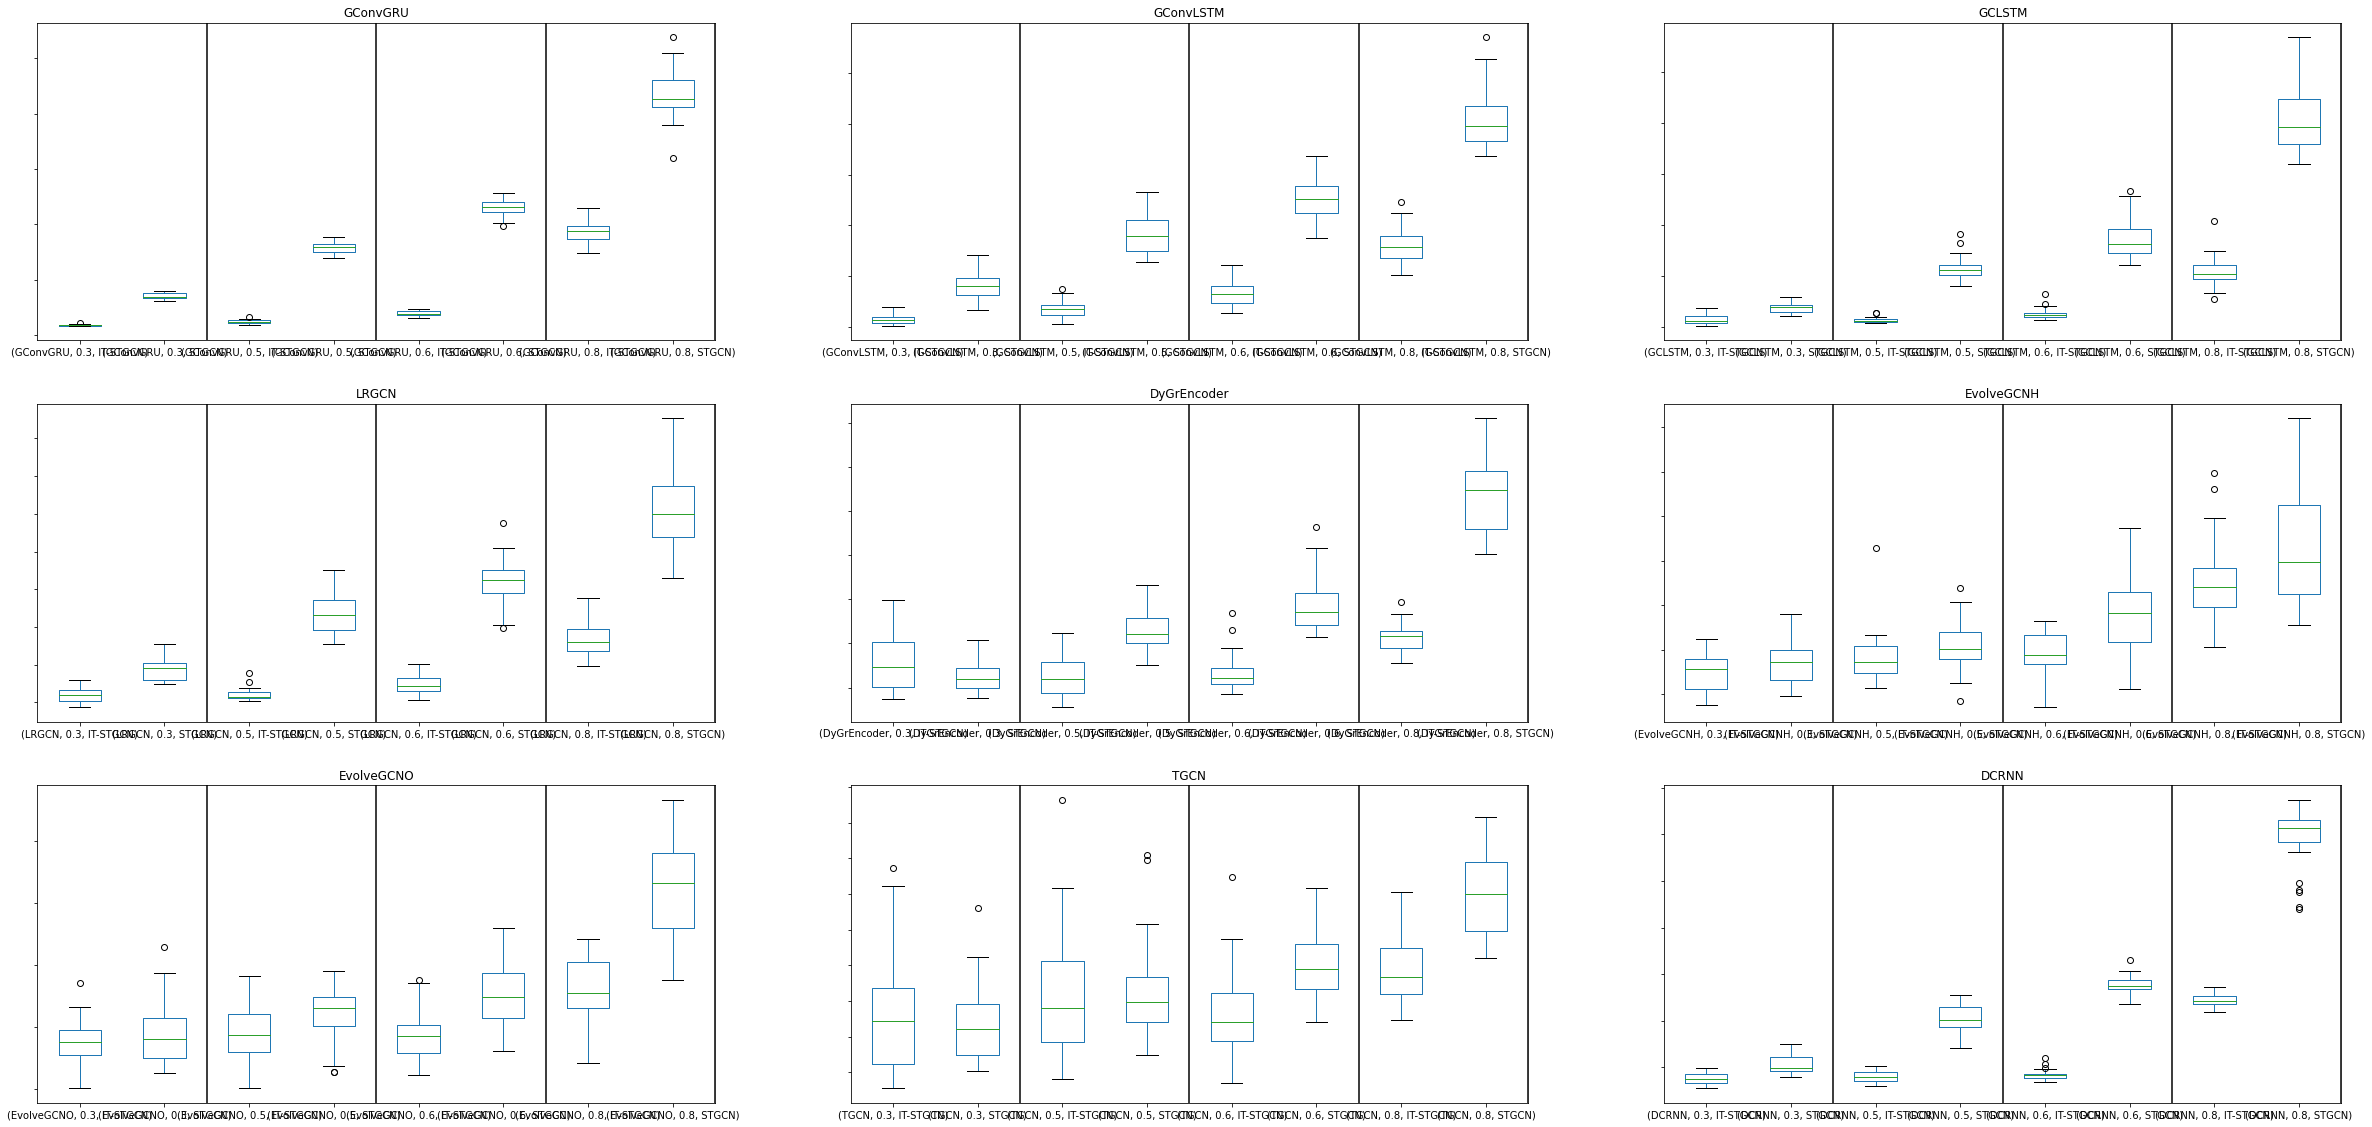

In [80]:
fig, ax = plt.subplots(3, 3,figsize=(40,20))

df.query("dataset=='wikimath' and mtype=='rand' and inter_method == 'linear' and nof_filters==12 and lags==8 and epoch==50 and model=='GConvGRU'").\
iloc[:,[1,2,8,10]].boxplot(by=['model','mrate','method'],ax=ax[0,0],grid=False,widths=0.5)
ax[0,0].set_title('GConvGRU')

df.query("dataset=='wikimath' and mtype=='rand' and inter_method == 'linear' and nof_filters==64 and lags==8 and epoch==50 and model=='GConvLSTM'").\
iloc[:,[1,2,8,10]].boxplot(by=['model','mrate','method'],ax=ax[0,1],grid=False,widths=0.5)
ax[0,1].set_title('GConvLSTM')

df.query("dataset=='wikimath' and mtype=='rand' and inter_method == 'linear' and nof_filters==64 and lags==8 and epoch==50 and model=='GCLSTM'").\
iloc[:,[1,2,8,10]].boxplot(by=['model','mrate','method'],ax=ax[0,2],grid=False,widths=0.5)
ax[0,2].set_title('GCLSTM')

df.query("dataset=='wikimath' and mtype=='rand' and inter_method == 'linear' and nof_filters==32 and lags==8 and epoch==50 and model=='LRGCN'").\
iloc[:,[1,2,8,10]].boxplot(by=['model','mrate','method'],ax=ax[1,0],grid=False,widths=0.5)
ax[1,0].set_title('LRGCN')

df.query("dataset=='wikimath' and mtype=='rand' and inter_method == 'linear' and nof_filters==12 and lags==8 and epoch==50 and model=='DyGrEncoder'").\
iloc[:,[1,2,8,10]].boxplot(by=['model','mrate','method'],ax=ax[1,1],grid=False,widths=0.5)
ax[1,1].set_title('DyGrEncoder')

df.query("dataset=='wikimath' and mtype=='rand' and inter_method == 'linear' and lags==8 and epoch==50 and model=='EvolveGCNH'").\
iloc[:,[1,2,8,10]].boxplot(by=['model','mrate','method'],ax=ax[1,2],grid=False,widths=0.5)
ax[1,2].set_title('EvolveGCNH')

df.query("dataset=='wikimath' and mtype=='rand' and inter_method == 'linear' and lags==8 and epoch==50 and model=='EvolveGCNO'").\
iloc[:,[1,2,8,10]].boxplot(by=['model','mrate','method'],ax=ax[2,0],grid=False,widths=0.5)
ax[2,0].set_title('EvolveGCNO')

df.query("dataset=='wikimath' and mtype=='rand' and inter_method == 'linear' and nof_filters==12 and lags==8 and epoch==50 and model=='TGCN'").\
iloc[:,[1,2,8,10]].boxplot(by=['model','mrate','method'],ax=ax[2,1],grid=False,widths=0.5)
ax[2,1].set_title('TGCN')

df.query("dataset=='wikimath' and mtype=='rand' and inter_method == 'linear' and nof_filters==12 and lags==8 and epoch==50 and model=='DCRNN'").\
iloc[:,[1,2,8,10]].boxplot(by=['model','mrate','method'],ax=ax[2,2],grid=False,widths=0.5)
ax[2,2].set_title('DCRNN')


for ax in ax.flat:
    ax.set_yticklabels([])
    ax.axvline(x=2.5, color='black', linestyle='-')
    ax.axvline(x=4.5, color='black', linestyle='-')
    ax.axvline(x=6.5, color='black', linestyle='-')
    ax.axvline(x=8.5, color='black', linestyle='-')
    # ax.set_xticklabels(['IT-TGNN','TGNN','IT-TGNN','TGNN','IT-TGNN','TGNN','IT-TGNN','TGNN','IT-TGNN','TGNN'])
    ax.set_xlabel('')
    ax.set_ylabel('')
    
fig.suptitle('',fontsize=40)

In [81]:
pd.merge(df.query("dataset=='wikimath' and mtype=='rand'").groupby(['model','mrate','lags','nof_filters','inter_method','method'])['mse'].mean().reset_index(),
         df.query("dataset=='wikimath' and mtype=='rand'").groupby(['model','mrate','lags','nof_filters','inter_method','method'])['mse'].std().reset_index(),
         on=['model','method','nof_filters','mrate','inter_method','lags']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3).query("mrate == 0.3")

In [82]:
pd.merge(df.query("dataset=='wikimath' and mtype=='rand'").groupby(['model','mrate','lags','inter_method','method'])['mse'].mean().reset_index(),
         df.query("dataset=='wikimath' and mtype=='rand'").groupby(['model','mrate','lags','inter_method','method'])['mse'].std().reset_index(),
         on=['model','method','mrate','inter_method','lags']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3).query("mrate != 0.3")

## Block

In [83]:
pd.merge(df.query("dataset=='wikimath' and mtype=='block'").groupby(['model','mrate','lags','inter_method','method'])['mse'].mean().reset_index(),
         df.query("dataset=='wikimath' and mtype=='block'").groupby(['model','mrate','lags','inter_method','method'])['mse'].std().reset_index(),
         on=['model','method','mrate','inter_method','lags']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3)

## missing values on the same nodes

In [84]:
pd.merge(df2.query("dataset=='wikimath'").groupby(['model','mrate','lags','method'])['mse'].mean().reset_index(),
        df2.query("dataset=='wikimath'").groupby(['model','mrate','lags','method'])['mse'].std().reset_index(),
         on=['model','method','mrate','lags']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3)

# Windmillsmall(lags=8)

In [85]:
df.query("model=='GNAR' and dataset=='windmillsmall'")

## Baseline

In [86]:
pd.merge(df.query("dataset=='windmillsmall' and mrate==0").groupby(['model','lags'])['mse'].mean().reset_index(),
         df.query("dataset=='windmillsmall' and mrate==0").groupby(['model','lags'])['mse'].std().reset_index(),
         on=['model','lags']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3)

## Random

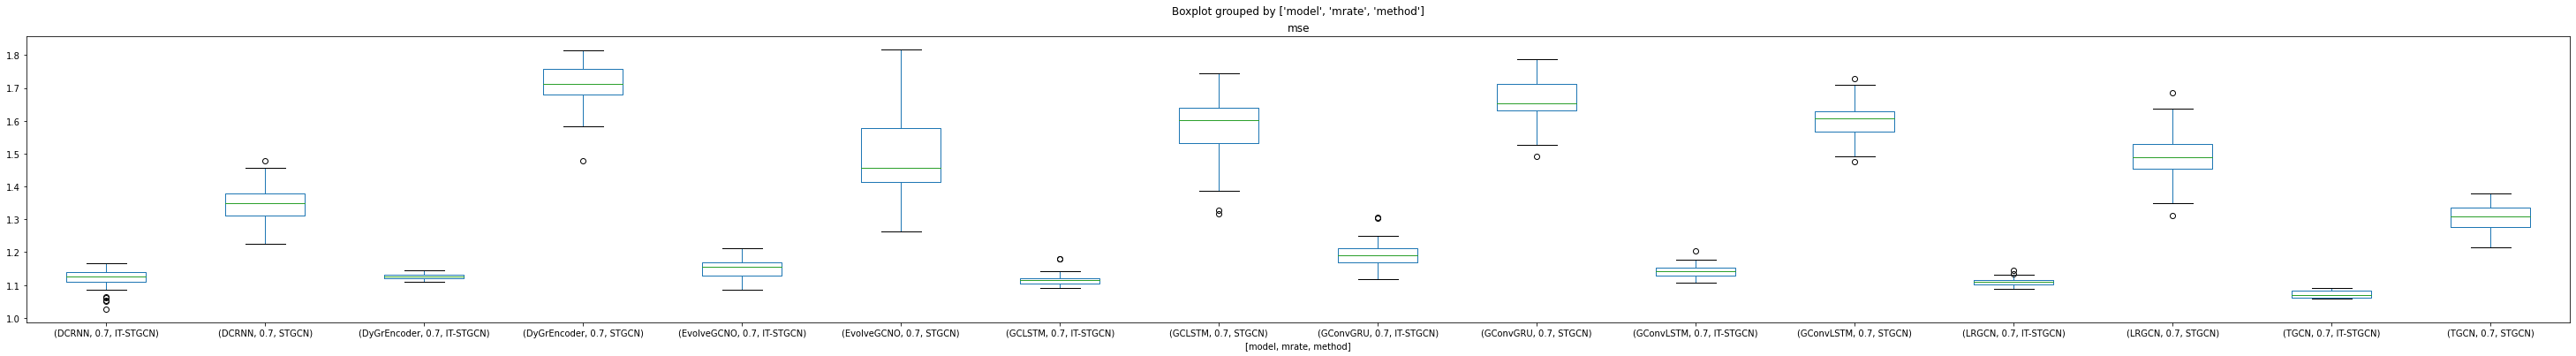

In [87]:
fig, ((ax1)) = plt.subplots(nrows=1, ncols=1, figsize=(50, 6), sharey=True)
df.query("dataset=='windmillsmall' and mtype=='rand' and inter_method == 'linear' and lags==8 and epoch==50").\
iloc[:,[1,2,8,10]].boxplot(by=['model','mrate','method'],ax=ax1,grid=False,widths=0.5)

In [88]:
pd.merge(df.query("dataset=='windmillsmall' and mtype=='rand'").groupby(['model','mrate','lags','inter_method','method'])['mse'].mean().reset_index(),
         df.query("dataset=='windmillsmall' and mtype=='rand'").groupby(['model','mrate','lags','inter_method','method'])['mse'].std().reset_index(),
         on=['model','method','mrate','inter_method','lags']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3)

## Block

In [89]:
pd.merge(df.query("dataset=='windmillsmall' and mtype=='block'").groupby(['model','mrate','nof_filters','lags','method'])['mse'].mean().reset_index(),
         df.query("dataset=='windmillsmall' and mtype=='block'").groupby(['model','mrate','nof_filters','lags','method'])['mse'].std().reset_index(),
         on=['model','method','nof_filters','mrate','lags']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3)

# Montevideobus (lags=4)

In [90]:
df.query("model=='GNAR' and dataset=='monte'")

## Baseline

In [91]:
pd.merge(df.query("dataset=='monte' and mrate==0").groupby(['model','lags'])['mse'].mean().reset_index(),
         df.query("dataset=='monte' and mrate==0").groupby(['model','lags'])['mse'].std().reset_index(),
         on=['model','lags']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3)

## Random

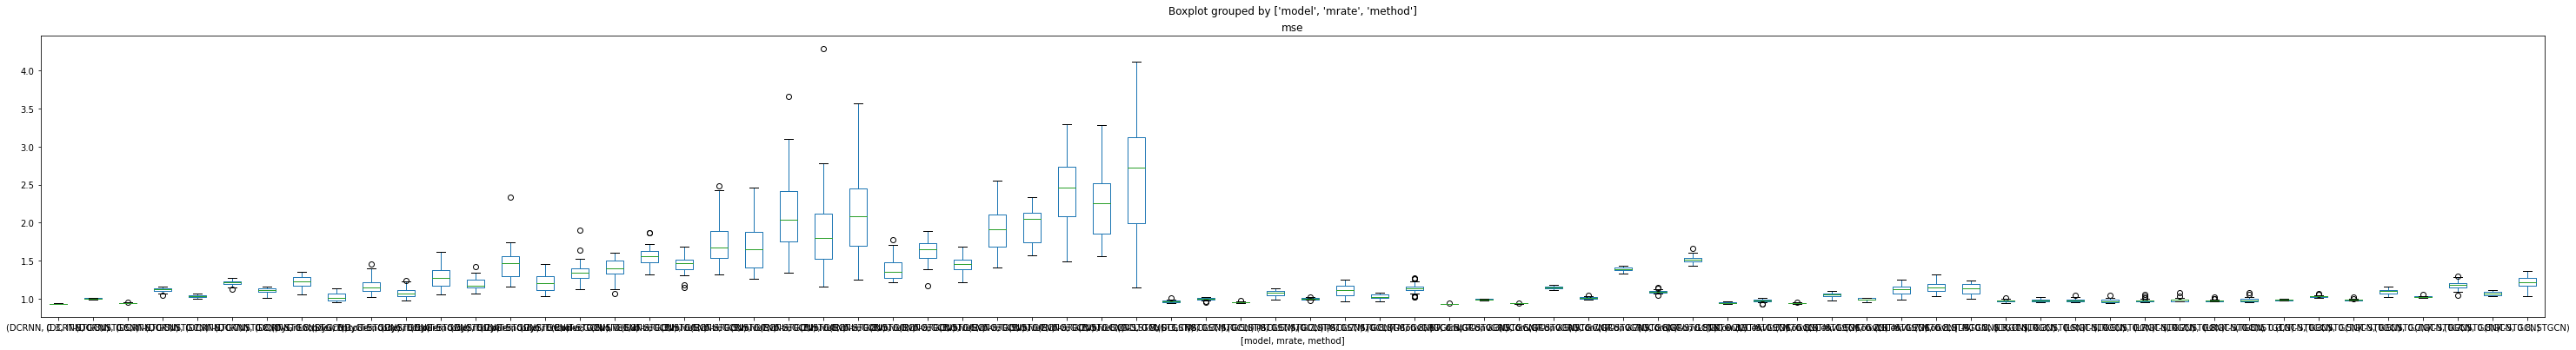

In [92]:
fig, ((ax1)) = plt.subplots(nrows=1, ncols=1, figsize=(50, 6), sharey=True)
df.query("dataset=='monte' and mtype=='rand' and inter_method == 'nearest' and lags==4 and epoch==50").\
iloc[:,[1,2,8,10]].boxplot(by=['model','mrate','method'],ax=ax1,grid=False,widths=0.5)

In [93]:
pd.merge(df.query("dataset=='monte' and mtype=='rand'").groupby(['model','mrate','nof_filters','lags','inter_method','method'])['mse'].mean().reset_index(),
         df.query("dataset=='monte' and mtype=='rand'").groupby(['model','mrate','nof_filters','lags','inter_method','method'])['mse'].std().reset_index(),
         on=['model','mrate','nof_filters','inter_method','method','mrate','lags']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3)

## Block

In [94]:
pd.merge(df.query("dataset=='monte' and mtype=='block'").groupby(['model','mrate','lags','inter_method','method'])['mse'].mean().reset_index(),
         df.query("dataset=='monte' and mtype=='block'").groupby(['model','mrate','lags','inter_method','method'])['mse'].std().reset_index(),
         on=['model','method','mrate','inter_method','lags']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3)

In [95]:
pd.merge(df.query("dataset=='monte' and mtype=='block'").groupby(['model','mrate','lags','inter_method','method'])['mse'].mean().reset_index(),
         df.query("dataset=='monte' and mtype=='block'").groupby(['model','mrate','lags','inter_method','method'])['mse'].std().reset_index(),
         on=['model','method','mrate','inter_method','lags']).rename(columns={'mse_x':'mean','mse_y':'std'}).round(3).query("inter_method=='nearest'")